In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, kstest
alpha=.05

%matplotlib inline


import os
from symtable import symtable

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import *
import pydataset
import env
import seaborn as sns
from sympy.matrices import Matrix
from IPython.display import display

from functools import reduce





### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.



1. Using [lemonade.csv](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv) dataset and focusing on continuous variables:
    * Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
    * Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    * Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
    * Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
    * Use a 2 sigma decision rule to isolate the outliers.
        * Do these make sense?
        * Should certain outliers be kept or removed?
3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [4]:

url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)
df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:


# sns.relplot(x='x', y='y', col='dataset', data=df)
# df.groupby("dataset").describe()


df['Date']=pd.to_datetime(df.Date)
df.dtypes
df=df.set_index('Date',drop=True)
df.drop(columns=['Day'],inplace=True)
df

,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,
2017-01-01,27.0,2.00,15,0.5,10
2017-01-02,28.9,1.33,15,0.5,13
2017-01-03,34.5,1.33,27,0.5,15
2017-01-04,44.1,1.05,28,0.5,17
2017-01-05,42.4,1.00,33,0.5,18
...,...,...,...,...,...
2017-12-27,42.7,1.00,33,0.5,19
2017-12-28,37.8,1.25,32,0.5,16
2017-12-29,39.5,1.25,17,0.5,15


In [43]:
def getupperandlower(ser, k=1.5):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe. This was a gift from our instructor. It is an implementation of the Tukey method.
        https://en.wikipedia.org/wiki/Tukey%27s_range_test
    '''
    # Create a column that will label our rows as containing an outlier value or not


    q1, q3 = ser.quantile([.25, .75])  # get quartiles

    iqr = q3 - q1   # calculate interquartile range

    upper_bound = q3 + k * iqr   # get upper bound
    lower_bound = q1 - k * iqr   # get lower boun   
    # update the outlier label any time that the value is outside of boundaries
    df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    # df = df[df.outlier == False]
  
    print(f"Number of observations removed: {num_obs - df.shape[0]}")


def zscored(df,numcols,numstds):
    zscoredDf=df[numcols].apply(zscore,axis=1)



    for col in numcols:
    
        # df[f'{col}_zscored']=zscoredDf[f'{col}']
        zscoredDf[f'{col}']=zscoredDf[f'{col}'].map(lambda x: (abs(x)<=numstds))
    
    return df,zscoredDf





In [51]:
from matplotlib.figure import figaspect
from matplotlib.pyplot import axes, figtext


def normal(df,col,alpha,printit=False):
    s,p=kstest(rvs=df[col],cdf='norm')
    null="Our null hypothesis: 'The data follows a normal distribution'"
   
    if p < alpha:
        normal=False
   
        # print(f'{null} is \n{normal}\np: {p} v {alpha}\n')

    else:
        normal=True
      
    
    if printit==True:
         print(f'{col}\n ')
         print(f'{null} is \n{normal}\n')

    
    return normal




def numericalNormal(df,numerical,alpha):
    for col in numerical:
        normal(df,col,alpha)
    


def univariate(df,catrange=[2,5]):

    # cat,num=vartypes(df,catrange)
    num=df.select_dtypes(include='number').columns.to_list()
    cat=df.select_dtypes(exclude='number').columns.to_list()
    # display(symbols('Categorical~Variables'))
    for i in cat:
        # display(symbols(i.replace('_','~')))
        # display(symbols('Value~Counts'))
        display(df[i].value_counts())
        display(df[i].value_counts(normalize=True)*100)       
        sns.countplot(x=i,data=df)
        plt.show()
    # display(symbols('Numerical~Variabless'))
    for i in num:
        # display(symbols(i.replace('_','~'.capitalize())))       
        fig,axs=plt.subplots(1,2,sharex=True)
        kwargs=( {'family':'sans-serif'} )
        fig.suptitle(t=f'Box and KDE for {i}',**kwargs)
        sns.histplot( x=i,data=df, kde=True,ax=axs[0])
        sns.boxplot(x=i,data=df,ax=axs[1])
        axs[1].axhline(c='blue', lw=1)
        
      
        fig.set_figheight(8)
        fig.set_figwidth(24)
    
        plt.show()
        print("\n\n\n")


def pd_DF_one_shot_info(df,log_bool=False,alpha=.05):
    uniquevales=df.select_dtypes(include="number").nunique().sort_values()
    plot_u=uniquevales.plot.bar(logy=log_bool,figsize=(24,8),title='Unique values per column',rot=45)
    total_var=df.var(axis=0)
    total_skew=df.skew(axis=0)
    total_kurtosis=df.kurtosis(axis=0)
    statsuff={'var':total_var,'skew':total_skew,'kurt':total_kurtosis}   
    stats=pd.concat(statsuff,axis=1)
    stats=stats.T
   
   
    nums=df.select_dtypes(include="number").columns.to_list()
    normalornotdic={}
    for n in nums:
        res=normal(df,n,alpha)
        normalornotdic.update({n:res})
    oneshot=pd.concat(
        [stats,
        pd.DataFrame(df.dtypes,columns=['dtypes']).T,
        df.describe(include='all')],axis=0)
    oneshot=oneshot.T
    oneshot['normal_distrib']=''
    oneshot['normal_distrib']=oneshot.index.map(mapper=(lambda x: normalornotdic.get(x)))
    oneshot=oneshot.T
    
    display(oneshot,df.info(show_counts=True, verbose=True),plot_u)  
 
   
  
    univariate(df)

    # oneshot=oneshot.merge(right=normalornotdic,left_index=True,how='cross')
        

# Plot information with y-axis in log-scale
        
   
    return oneshot




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  365 non-null    float64
 1   Rainfall     365 non-null    float64
 2   Flyers       365 non-null    int64  
 3   Price        365 non-null    float64
 4   Sales        365 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 25.2 KB


,Temperature,Rainfall,Flyers,Price,Sales
var,327.0995,0.075016,190.066054,0.0,957.786873
skew,1.545415,1.838357,-0.196932,0.0,13.246016
kurt,12.298849,5.190543,2.26842,0.0,203.790338
dtypes,float64,float64,int64,float64,int64
count,365.0,365.0,365.0,365.0,365.0
mean,61.224658,0.825973,40.10411,0.5,27.865753
std,18.085892,0.27389,13.786445,0.0,30.948132
min,15.1,0.4,-38.0,0.5,7.0
25%,49.7,0.65,31.0,0.5,20.0
50%,61.1,0.74,39.0,0.5,25.0


None

<AxesSubplot:title={'center':'Unique values per column'}>

TypeError: select_dtypes() got an unexpected keyword argument 'exlude'

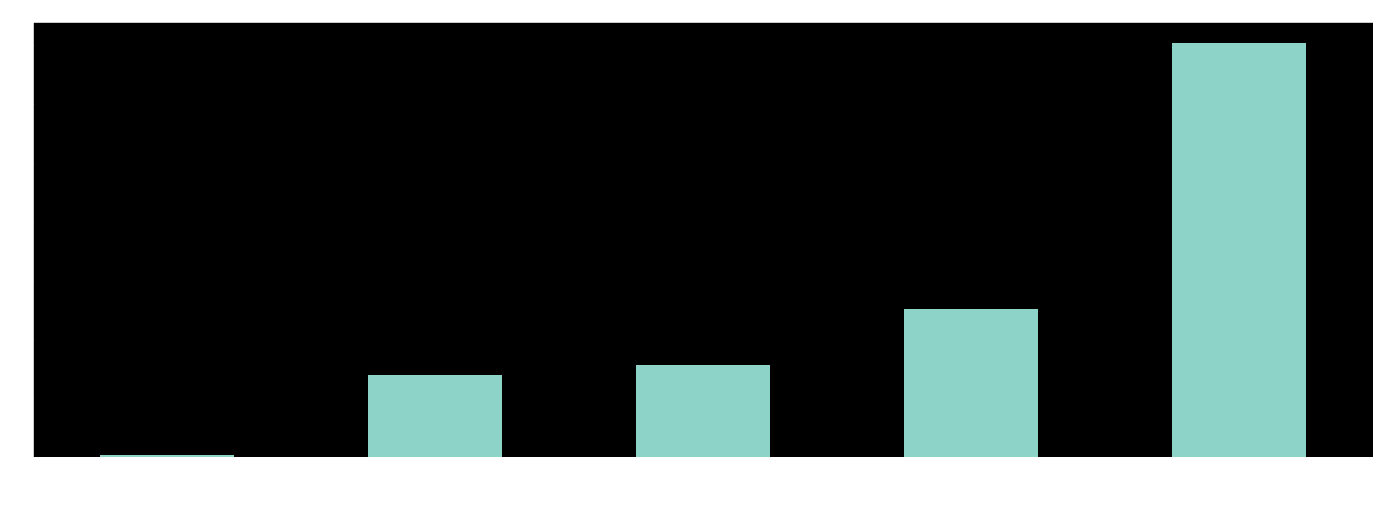

In [50]:

oneshot=pd_DF_one_shot_info(df,log_bool=False)

,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,
2017-01-01,27.0,2.00,15,0.5,10
2017-01-02,28.9,1.33,15,0.5,13
2017-01-03,34.5,1.33,27,0.5,15
2017-01-04,44.1,1.05,28,0.5,17
2017-01-05,42.4,1.00,33,0.5,18
...,...,...,...,...,...
2017-12-27,42.7,1.00,33,0.5,19
2017-12-28,37.8,1.25,32,0.5,16
2017-12-29,39.5,1.25,17,0.5,15


,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,
2017-01-01,False,True,True,False,True
2017-01-02,False,False,True,False,True
2017-01-03,False,False,True,False,True
2017-01-04,False,False,True,False,True
2017-01-05,False,False,True,False,True
...,...,...,...,...,...
2017-12-27,False,False,True,False,True
2017-12-28,False,False,True,False,True
2017-12-29,False,True,True,True,True


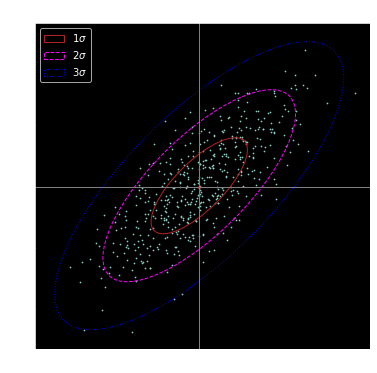

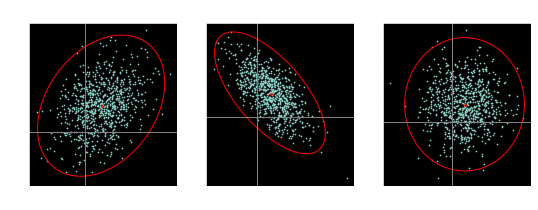

In [48]:
        
cols=df.columns.to_list()

df,zcored=zscored(df,cols,1)
display(df,zcored)








def univariate(df,catrange=[2,5]):

    # cat,num=vartypes(df,catrange)
    num=df.select_dtypes(include='number').columns.to_list()
    cat=df.select_dtypes(exlude='number').columns.to_list()
    display(symbols('Categorical~Variables'))
    for i in cat:
        display(symbols(i.replace('_','~')))
        display(symbols('Value~Counts'))
        display(df[i].value_counts())
        display(df[i].value_counts(normalize=True)*100)       
        sns.countplot(x=i,data=df)
        plt.show()
    display(symbols('Numerical~Variabless'))
    for i in num:
        display(symbols(i.replace('_','~'.capitalize())))       
        sns.boxplot(x=i,data=df)
        plt.show()
        df[i].hist()
        plt.show()







### https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html


from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


###plot


def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()



np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

In [49]:

# for some series s:
def get_upper_outliers(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k*iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))




def add_upper_outlier_columns(df, k=1.5):
    for col in df.select_dtypes('number'):
        df[col + '_upper_outliers'] = get_upper_outliers(df[col], k)
    return df


def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

def handle_missing_values(df, 
                          prop_required_columns=0.5, 
                          prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold)
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold)
    return df  
